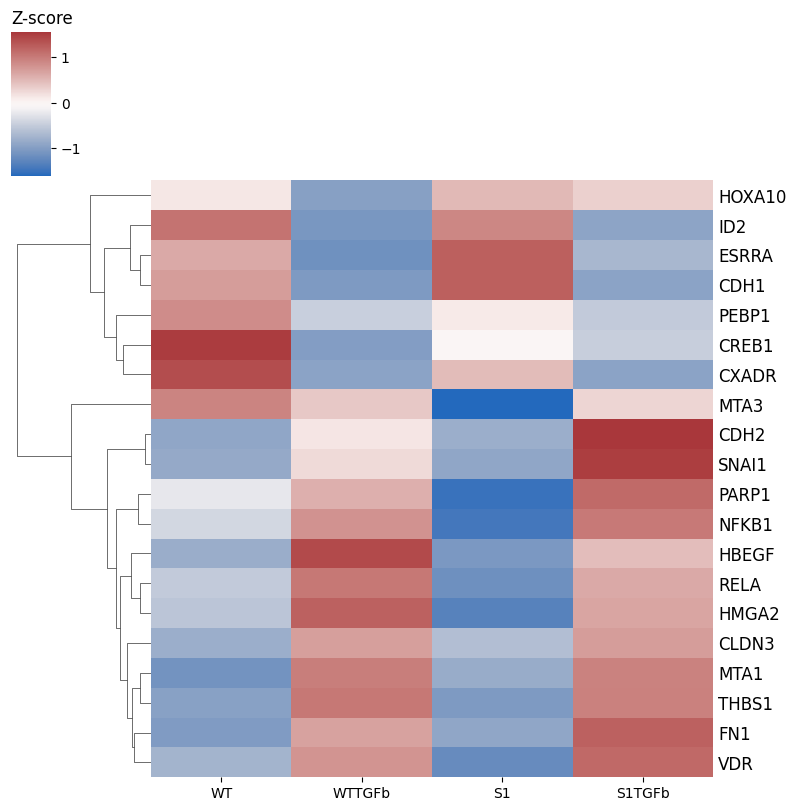

In [ ]:
# Heatmap for SNAI1 regulated nodes grouped (Figure 5a)

# Import necessary libraries
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Load your normalized counts and significant genes
counts_path = r'C:\Users\jtn170230\OneDrive - The University of Texas at Dallas\Bleris Lab\EMT\RNA sequencing\data\fCounts\DESeq2\normalized_counts_filtered.csv'
gene_list_path = r'C:\Users\jtn170230\Documents\Cytoscape 3\SNAI1-directConnect.csv'

# Step 1: Read the main CSV into a DataFrame
df = pd.read_csv(counts_path, index_col=0)

# Step 2: Read the gene list CSV into a DataFrame
gene_list_df = pd.read_csv(gene_list_path, header=0)  # header=0 to account for the 'Gene' header

# Step 3: Extract gene IDs
gene_ids = gene_list_df['Gene']

# Step 4: Filter the main DataFrame to keep only the significant genes
norm_counts = df.loc[df.index.intersection(gene_ids)]

# Step 5: Scale the counts (convert to z-scores)
scaled_counts = norm_counts.apply(zscore, axis=1)

# Step 6: Rename the columns (samples)
new_sample_names = ['WT-1', 'WT-2', 'WT-3', 'WTTGFb-1', 'WTTGFb-2', 'WTTGFb-3', 
                    'S1-1', 'S1-2', 'S1-3', 'S1TGFb-1', 'S1TGFb-2', 'S1TGFb-3']
scaled_counts.columns = new_sample_names

# Step 7: Group samples into 4 triplicate groups and compute the mean
grouped_data = {
    'WT': scaled_counts[['WT-1', 'WT-2', 'WT-3']].mean(axis=1),
    'WTTGFb': scaled_counts[['WTTGFb-1', 'WTTGFb-2', 'WTTGFb-3']].mean(axis=1),
    'S1': scaled_counts[['S1-1', 'S1-2', 'S1-3']].mean(axis=1),
    'S1TGFb': scaled_counts[['S1TGFb-1', 'S1TGFb-2', 'S1TGFb-3']].mean(axis=1)
}

# Convert to DataFrame
grouped_df = pd.DataFrame(grouped_data)

# Step 8: Custom color palette: negative z-scores green, positive z-scores red, zero black
color_palette = sns.color_palette("vlag", as_cmap=True)

# Step 9: Create a clustermap for the grouped data
g = sns.clustermap(grouped_df, cmap=color_palette, figsize=(8, 8), method='average', metric='euclidean',
                   row_cluster=True, col_cluster=False, xticklabels=True, yticklabels=True)

# Step 10: Change font size for y-tick labels and ensure all labels are shown
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=12)  # Adjust font size as needed
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # Rotate labels if necessary to avoid overlap

# Ensure all labels are shown (disable automatic hiding)
g.ax_heatmap.yaxis.set_tick_params(length=0)  # Remove tick lines

# Step 11: Add a Z-score title to the legend
colorbar = g.cax
colorbar.set_title('Z-score', loc='left')

# Show the plot
plt.show()

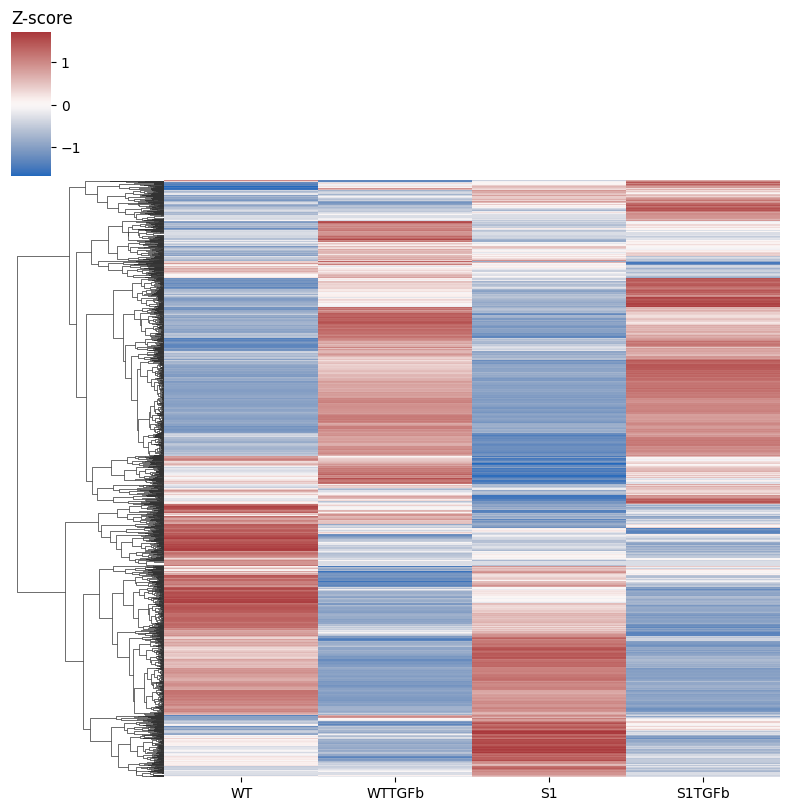

In [ ]:
# Heatmap for global EMT genes grouped (Figure 5b)

# Import necessary libraries
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Load your normalized counts and significant genes
counts_path = r'C:\Users\jtn170230\OneDrive - The University of Texas at Dallas\Bleris Lab\EMT\RNA sequencing\data\fCounts\DESeq2\normalized_counts_filtered.csv'
gene_list_path = r'C:\Users\jtn170230\Documents\Cytoscape 3\EMTGenes.csv'

# Step 1: Read the main CSV into a DataFrame
df = pd.read_csv(counts_path, index_col=0)

# Step 2: Read the gene list CSV into a DataFrame
gene_list_df = pd.read_csv(gene_list_path, header=0)  # header=0 to account for the 'Gene' header

# Step 3: Extract gene IDs
gene_ids = gene_list_df['Gene']

# Step 4: Filter the main DataFrame to keep only the significant genes
norm_counts = df.loc[df.index.intersection(gene_ids)]

# Step 5: Scale the counts (convert to z-scores)
scaled_counts = norm_counts.apply(zscore, axis=1)

# Step 6: Rename the columns (samples)
new_sample_names = ['WT-1', 'WT-2', 'WT-3', 'WTTGFb-1', 'WTTGFb-2', 'WTTGFb-3', 
                    'S1-1', 'S1-2', 'S1-3', 'S1TGFb-1', 'S1TGFb-2', 'S1TGFb-3']
scaled_counts.columns = new_sample_names

# Step 7: Group samples into 4 triplicate groups and compute the mean
grouped_data = {
    'WT': scaled_counts[['WT-1', 'WT-2', 'WT-3']].mean(axis=1),
    'WTTGFb': scaled_counts[['WTTGFb-1', 'WTTGFb-2', 'WTTGFb-3']].mean(axis=1),
    'S1': scaled_counts[['S1-1', 'S1-2', 'S1-3']].mean(axis=1),
    'S1TGFb': scaled_counts[['S1TGFb-1', 'S1TGFb-2', 'S1TGFb-3']].mean(axis=1)
}

# Convert to DataFrame
grouped_df = pd.DataFrame(grouped_data)

# Step 8: Custom color palette: negative z-scores green, positive z-scores red, zero black
color_palette = sns.color_palette("vlag", as_cmap=True)

# Step 9: Create a clustermap for the grouped data
g = sns.clustermap(grouped_df, cmap=color_palette, figsize=(8, 8), method='average', metric='euclidean',
                   row_cluster=True, col_cluster=False, xticklabels=True, yticklabels=False)

# Step 10: Change font size for y-tick labels and ensure all labels are shown
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=12)  # Adjust font size as needed
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # Rotate labels if necessary to avoid overlap

# Ensure all labels are shown (disable automatic hiding)
g.ax_heatmap.yaxis.set_tick_params(length=0)  # Remove tick lines

# Step 11: Add a Z-score title to the legend
colorbar = g.cax
colorbar.set_title('Z-score', loc='left')

# Show the plot
plt.show()

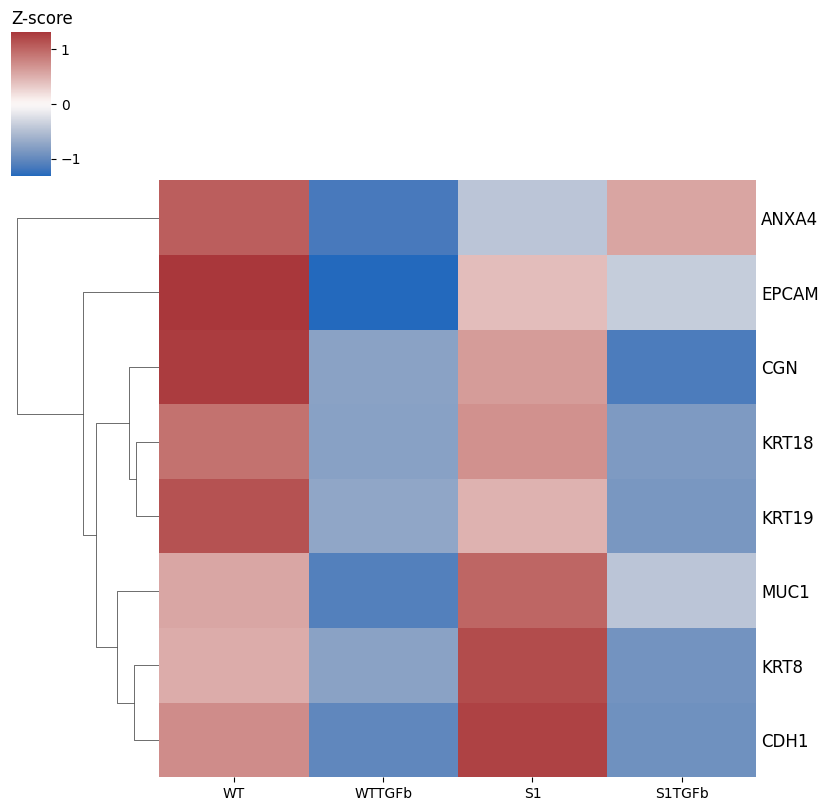

In [ ]:
# Heatmap E-marker grouped (Figure 5c-left)

# Import necessary libraries
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Load your normalized counts and significant genes
counts_path = r'C:\Users\jtn170230\OneDrive - The University of Texas at Dallas\Bleris Lab\EMT\RNA sequencing\data\fCounts\DESeq2\normalized_counts_filtered.csv'
gene_list_path = r'C:\Users\jtn170230\Documents\Cytoscape 3\ENodes4.csv'

# Step 1: Read the main CSV into a DataFrame
df = pd.read_csv(counts_path, index_col=0)

# Step 2: Read the gene list CSV into a DataFrame
gene_list_df = pd.read_csv(gene_list_path, header=0)  # header=0 to account for the 'Gene' header

# Step 3: Extract gene IDs
gene_ids = gene_list_df['Gene']

# Step 4: Filter the main DataFrame to keep only the significant genes
norm_counts = df.loc[df.index.intersection(gene_ids)]

# Step 5: Scale the counts (convert to z-scores)
scaled_counts = norm_counts.apply(zscore, axis=1)

# Step 6: Rename the columns (samples)
new_sample_names = ['WT-1', 'WT-2', 'WT-3', 'WTTGFb-1', 'WTTGFb-2', 'WTTGFb-3', 
                    'S1-1', 'S1-2', 'S1-3', 'S1TGFb-1', 'S1TGFb-2', 'S1TGFb-3']
scaled_counts.columns = new_sample_names

# Step 7: Group samples into 4 triplicate groups and compute the mean
grouped_data = {
    'WT': scaled_counts[['WT-1', 'WT-2', 'WT-3']].mean(axis=1),
    'WTTGFb': scaled_counts[['WTTGFb-1', 'WTTGFb-2', 'WTTGFb-3']].mean(axis=1),
    'S1': scaled_counts[['S1-1', 'S1-2', 'S1-3']].mean(axis=1),
    'S1TGFb': scaled_counts[['S1TGFb-1', 'S1TGFb-2', 'S1TGFb-3']].mean(axis=1)
}

# Convert to DataFrame
grouped_df = pd.DataFrame(grouped_data)

# Step 8: Custom color palette: negative z-scores green, positive z-scores red, zero black
color_palette = sns.color_palette("vlag", as_cmap=True)

# Step 9: Create a clustermap for the grouped data
g = sns.clustermap(grouped_df, cmap=color_palette, figsize=(8, 8), method='average', metric='euclidean',
                   row_cluster=True, col_cluster=False, xticklabels=True, yticklabels=True)

# Step 10: Change font size for y-tick labels and ensure all labels are shown
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=12)  # Adjust font size as needed
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # Rotate labels if necessary to avoid overlap

# Ensure all labels are shown (disable automatic hiding)
g.ax_heatmap.yaxis.set_tick_params(length=0)  # Remove tick lines

# Step 11: Add a Z-score title to the legend
colorbar = g.cax
colorbar.set_title('Z-score', loc='left')

# Show the plot
plt.show()

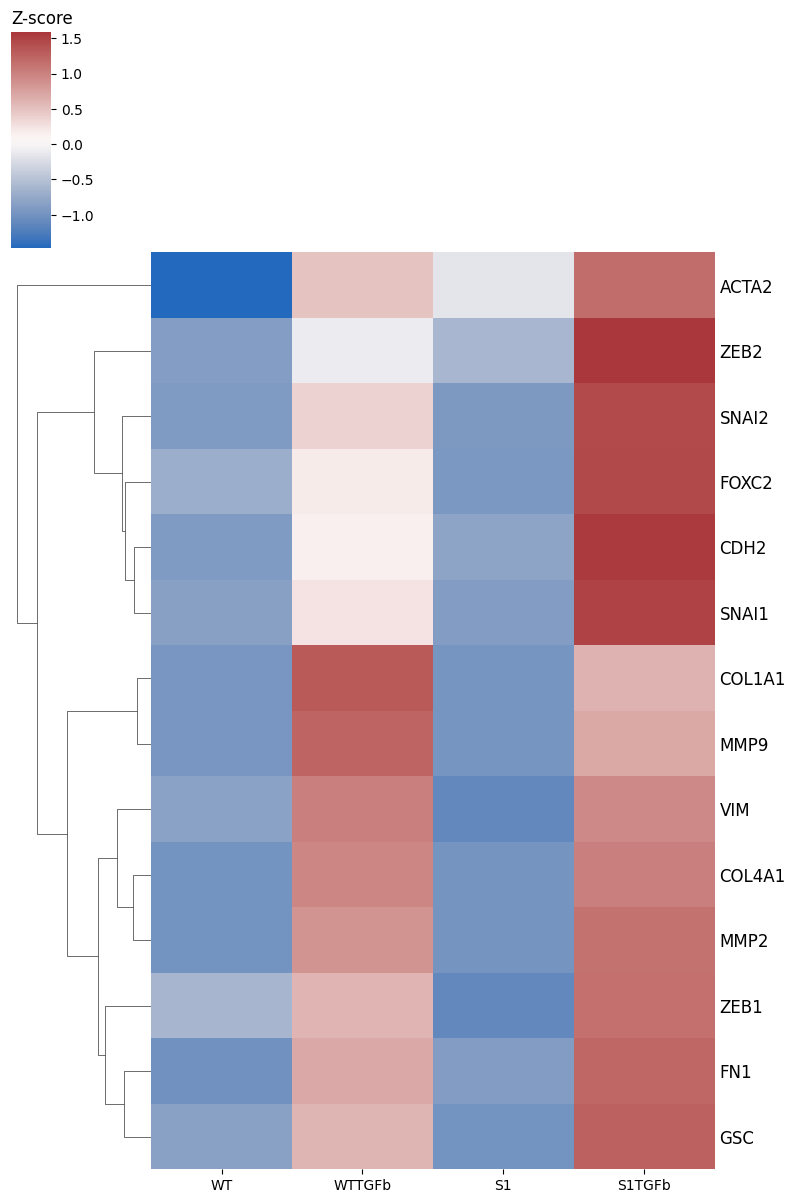

In [ ]:
# Heatmap M-marker grouped (Figure 5c-right)

# Import necessary libraries
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Load your normalized counts and significant genes
counts_path = r'C:\Users\jtn170230\OneDrive - The University of Texas at Dallas\Bleris Lab\EMT\RNA sequencing\data\fCounts\DESeq2\normalized_counts_filtered.csv'
gene_list_path = r'C:\Users\jtn170230\Documents\Cytoscape 3\MNodes4.csv'

# Step 1: Read the main CSV into a DataFrame
df = pd.read_csv(counts_path, index_col=0)

# Step 2: Read the gene list CSV into a DataFrame
gene_list_df = pd.read_csv(gene_list_path, header=0)  # header=0 to account for the 'Gene' header

# Step 3: Extract gene IDs
gene_ids = gene_list_df['Gene']

# Step 4: Filter the main DataFrame to keep only the significant genes
norm_counts = df.loc[df.index.intersection(gene_ids)]

# Step 5: Scale the counts (convert to z-scores)
scaled_counts = norm_counts.apply(zscore, axis=1)

# Step 6: Rename the columns (samples)
new_sample_names = ['WT-1', 'WT-2', 'WT-3', 'WTTGFb-1', 'WTTGFb-2', 'WTTGFb-3', 
                    'S1-1', 'S1-2', 'S1-3', 'S1TGFb-1', 'S1TGFb-2', 'S1TGFb-3']
scaled_counts.columns = new_sample_names

# Step 7: Group samples into 4 triplicate groups and compute the mean
grouped_data = {
    'WT': scaled_counts[['WT-1', 'WT-2', 'WT-3']].mean(axis=1),
    'WTTGFb': scaled_counts[['WTTGFb-1', 'WTTGFb-2', 'WTTGFb-3']].mean(axis=1),
    'S1': scaled_counts[['S1-1', 'S1-2', 'S1-3']].mean(axis=1),
    'S1TGFb': scaled_counts[['S1TGFb-1', 'S1TGFb-2', 'S1TGFb-3']].mean(axis=1)
}

# Convert to DataFrame
grouped_df = pd.DataFrame(grouped_data)

# Step 8: Custom color palette: negative z-scores green, positive z-scores red, zero black
color_palette = sns.color_palette("vlag", as_cmap=True)

# Step 9: Create a clustermap for the grouped data
g = sns.clustermap(grouped_df, cmap=color_palette, figsize=(8, 12), method='average', metric='euclidean',
                   row_cluster=True, col_cluster=False, xticklabels=True, yticklabels=True)

# Step 10: Change font size for y-tick labels and ensure all labels are shown
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=12)  # Adjust font size as needed
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # Rotate labels if necessary to avoid overlap

# Ensure all labels are shown (disable automatic hiding)
g.ax_heatmap.yaxis.set_tick_params(length=0)  # Remove tick lines

# Step 11: Add a Z-score title to the legend
colorbar = g.cax
colorbar.set_title('Z-score', loc='left')

# Show the plot
plt.show()

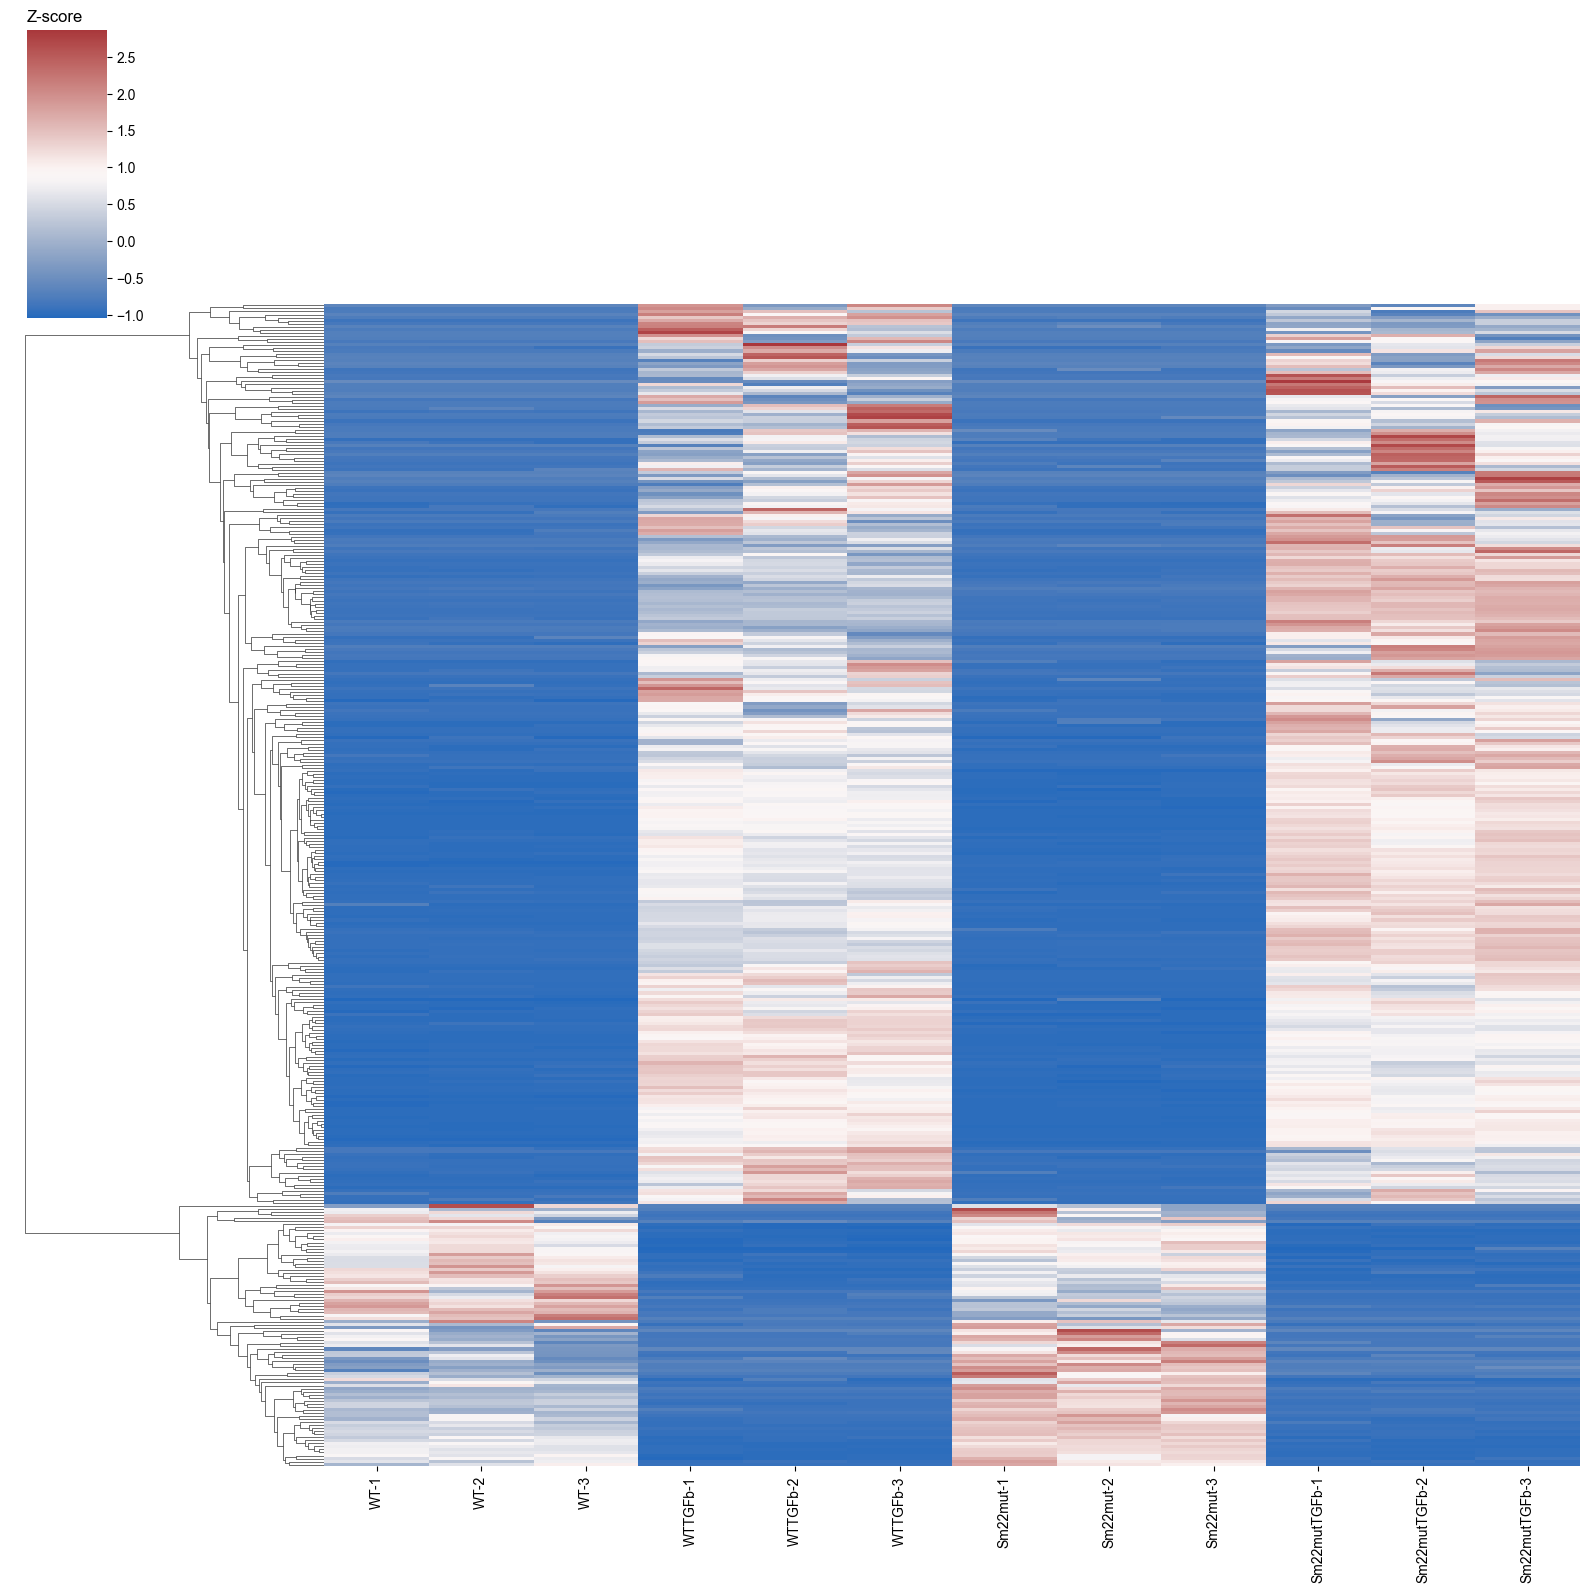

In [9]:
# Heatmap for all signicantly differentially expressed genes (Figure S12a)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib import rcParams

# Set Arial as the default font
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Load your normalized counts and significant genes
counts_path = r'C:\Users\jtn170230\OneDrive - The University of Texas at Dallas\Bleris Lab\EMT\RNA sequencing\data\fCounts\DESeq2\normalized_counts_filtered.csv'
gene_list_path = r'C:\Users\jtn170230\OneDrive - The University of Texas at Dallas\Bleris Lab\EMT\RNA sequencing\data\fCounts\DESeq2\significant_genes.csv' #significant genes

# Step 1: Read the main CSV into a DataFrame
df = pd.read_csv(counts_path, index_col=0)

# Step 2: Read the gene list CSV into a DataFrame
gene_list_df = pd.read_csv(gene_list_path, header=0)  # header=0 to account for the 'Geneid' header

# Step 3: Extract gene IDs
gene_ids = gene_list_df['Geneid']

# Step 4: Filter the main DataFrame to keep only the significant genes
norm_counts = df.loc[gene_ids]

# Step 5: Scale the counts (convert to z-scores)
scaled_counts = norm_counts.apply(zscore, axis=1)

# Step 6: Rename the columns (samples)
new_sample_names = ['WT-1', 'WT-2', 'WT-3', 'WTTGFb-1', 'WTTGFb-2', 'WTTGFb-3', 'Sm22mut-1', 'Sm22mut-2', 'Sm22mut-3', 'Sm22mutTGFb-1', 'Sm22mutTGFb-2', 'Sm22mutTGFb-3']
scaled_counts.columns = new_sample_names

# Step 7: Reorder the columns based on new sample names
scaled_counts = scaled_counts[new_sample_names]

# Step 8: Custom color palette: negative z-scores green, positive z-scores red, zero black
color_palette = sns.color_palette("vlag", as_cmap=True)

# Step 9: Create a clustermap
g = sns.clustermap(scaled_counts, cmap=color_palette, figsize=(16, 16), method='average', metric='euclidean',
                   row_cluster=True, col_cluster=False, xticklabels=True, yticklabels=False)

# Step 10: Add a Z-score title to the legend
colorbar = g.cax
colorbar.set_title('Z-score', loc='left')

# Show the plot
plt.show()

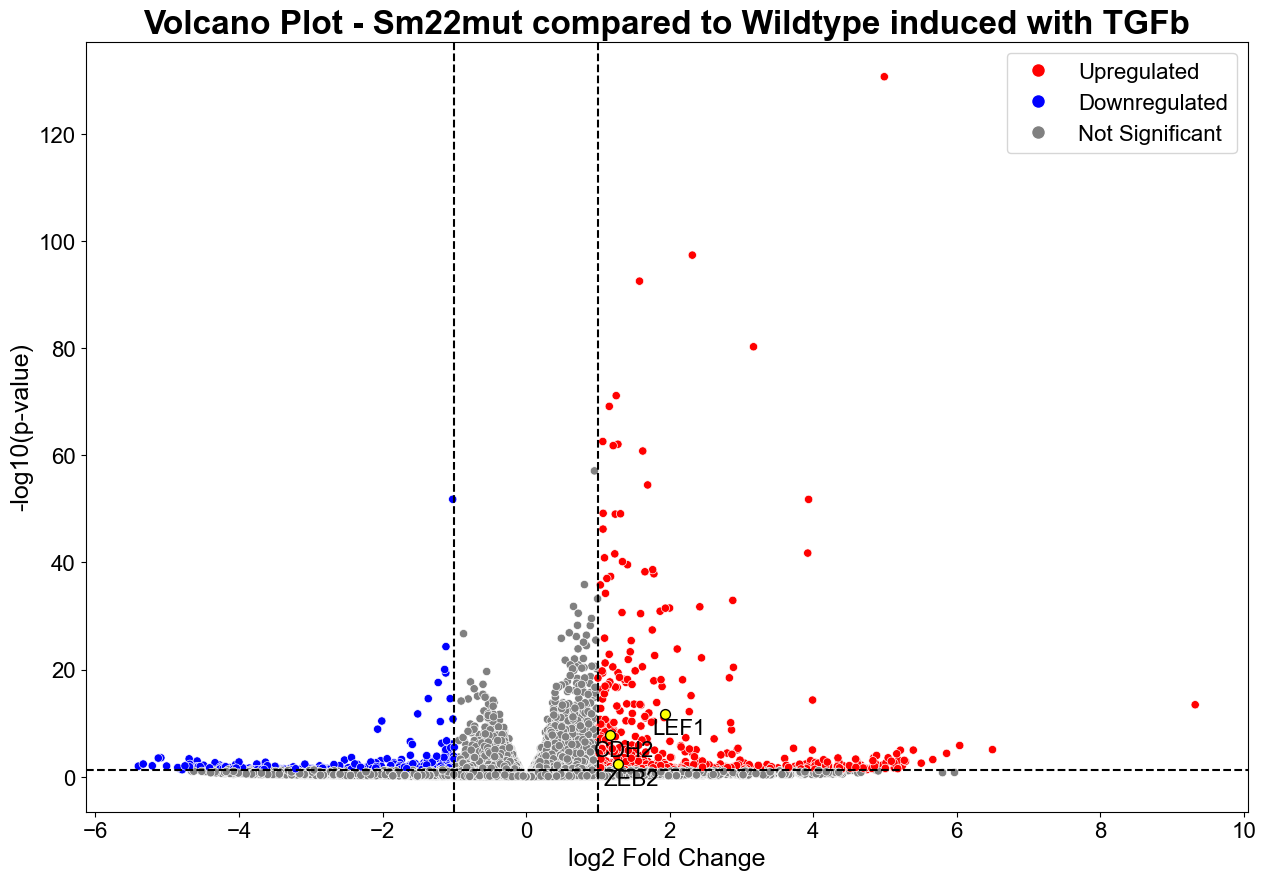

In [ ]:
# Volcano Plot (Figure S12b)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# Set Arial as the default font
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Load DESeq2 results
input_path = r'C:\Users\jtn170230\OneDrive - The University of Texas at Dallas\Bleris Lab\EMT\RNA sequencing\data\fCounts\DESeq2\DESeq2_resultsDtoB.csv'
deseq2_res = pd.read_csv(input_path)

# Add a column for -log10(p-value)
deseq2_res['neglog10(pvalue)'] = -np.log10(deseq2_res['pvalue'])

# Set thresholds
log2fc_threshold = 1  # log2 fold change threshold
pvalue_threshold = 0.05  # p-value threshold
neglog10pvalue_threshold = -np.log10(pvalue_threshold)

# Add a column for coloring
deseq2_res['color'] = 'grey'  # Default color
deseq2_res.loc[(deseq2_res['log2FoldChange'] > log2fc_threshold) & (deseq2_res['neglog10(pvalue)'] > neglog10pvalue_threshold), 'color'] = 'red'
deseq2_res.loc[(deseq2_res['log2FoldChange'] < -log2fc_threshold) & (deseq2_res['neglog10(pvalue)'] > neglog10pvalue_threshold), 'color'] = 'blue'

# Plot volcano plot
color_map = {'grey': 'grey', 'red': 'red', 'blue': 'blue'}
plt.figure(figsize=(15, 10))
sns.scatterplot(x='log2FoldChange', y='neglog10(pvalue)', data=deseq2_res, hue='color', palette=color_map)

# Add legend with custom labels
legend_labels = {
    'Upregulated': 'red',
    'Downregulated': 'blue',
    'Not Significant': 'grey'
}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in legend_labels.items()]
plt.legend(handles=handles, prop={'size':16})

# Add dashed lines for significance thresholds
plt.axhline(neglog10pvalue_threshold, linestyle='--', color='black')
plt.axvline(log2fc_threshold, linestyle='--', color='black')
plt.axvline(-log2fc_threshold, linestyle='--', color='black')

# Labels for specific genes from the first column
genes_to_label = ['ZEB2','CDH2','LEF1']
# genes_to_label = ['DDX11L1', 'WASH7P', 'PRDM16', 'PTCHD2', 'TMEM52', 'GABRD'] # Testing for proper color assignment
# Iterate over genes to label
for gene in genes_to_label:
    # Find row index of the gene
    row_index = deseq2_res.index[deseq2_res.iloc[:, 0] == gene].tolist()
    if row_index:
        x = deseq2_res.loc[row_index[0], 'log2FoldChange']
        y = deseq2_res.loc[row_index[0], 'neglog10(pvalue)']
        
        # Annotate the point with the gene name
        plt.annotate(gene, (x, y), textcoords="offset points", xytext=(10,-15), ha='center', fontsize=16, fontweight='regular', color='black')
        
        # Highlight the annotated point
        plt.scatter(x, y, color='yellow', s=50, edgecolor='black', zorder=5)  # Adjust size (s) and edgecolor as needed

# Labeling and title
plt.xlabel('log2 Fold Change',fontsize=18)
plt.ylabel('-log10(p-value)',fontsize=18)
plt.title('Volcano Plot - Sm22mut compared to Wildtype induced with TGFb',fontsize=24,fontweight='bold')

# Change tick font size
plt.tick_params(axis='x', labelsize=16)  # Change font size for x-axis ticks
plt.tick_params(axis='y', labelsize=16)  # Change font size for y-axis ticks

# Show plot
plt.show()

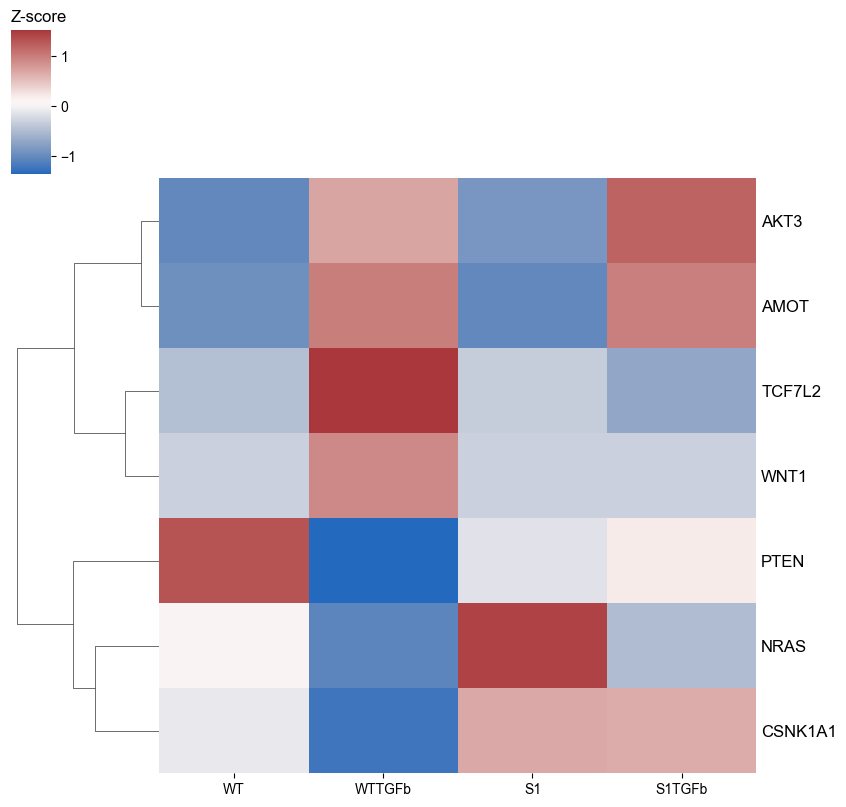

In [11]:
# Heatmap for miR-22 targets (Figure S16)

# Import necessary libraries
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Load your normalized counts and significant genes
counts_path = r'C:\Users\jtn170230\OneDrive - The University of Texas at Dallas\Bleris Lab\EMT\RNA sequencing\data\fCounts\DESeq2\normalized_counts_filtered.csv'
gene_list_path = r'C:\Users\jtn170230\Documents\Cytoscape 3\miR22targets.csv'

# Step 1: Read the main CSV into a DataFrame
df = pd.read_csv(counts_path, index_col=0)

# Step 2: Read the gene list CSV into a DataFrame
gene_list_df = pd.read_csv(gene_list_path, header=0)  # header=0 to account for the 'Gene' header

# Step 3: Extract gene IDs
gene_ids = gene_list_df['Gene']

# Step 4: Filter the main DataFrame to keep only the significant genes
norm_counts = df.loc[df.index.intersection(gene_ids)]

# Step 5: Scale the counts (convert to z-scores)
scaled_counts = norm_counts.apply(zscore, axis=1)

# Step 6: Rename the columns (samples)
new_sample_names = ['WT-1', 'WT-2', 'WT-3', 'WTTGFb-1', 'WTTGFb-2', 'WTTGFb-3', 
                    'S1-1', 'S1-2', 'S1-3', 'S1TGFb-1', 'S1TGFb-2', 'S1TGFb-3']
scaled_counts.columns = new_sample_names

# Step 7: Group samples into 4 triplicate groups and compute the mean
grouped_data = {
    'WT': scaled_counts[['WT-1', 'WT-2', 'WT-3']].mean(axis=1),
    'WTTGFb': scaled_counts[['WTTGFb-1', 'WTTGFb-2', 'WTTGFb-3']].mean(axis=1),
    'S1': scaled_counts[['S1-1', 'S1-2', 'S1-3']].mean(axis=1),
    'S1TGFb': scaled_counts[['S1TGFb-1', 'S1TGFb-2', 'S1TGFb-3']].mean(axis=1)
}

# Convert to DataFrame
grouped_df = pd.DataFrame(grouped_data)

# Step 8: Custom color palette: negative z-scores green, positive z-scores red, zero black
color_palette = sns.color_palette("vlag", as_cmap=True)

# Step 9: Create a clustermap for the grouped data
g = sns.clustermap(grouped_df, cmap=color_palette, figsize=(8, 8), method='average', metric='euclidean',
                   row_cluster=True, col_cluster=False, xticklabels=True, yticklabels=True)

# Step 10: Change font size for y-tick labels and ensure all labels are shown
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=12)  # Adjust font size as needed
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # Rotate labels if necessary to avoid overlap

# Ensure all labels are shown (disable automatic hiding)
g.ax_heatmap.yaxis.set_tick_params(length=0)  # Remove tick lines

# Step 11: Add a Z-score title to the legend
colorbar = g.cax
colorbar.set_title('Z-score', loc='left')

# Show the plot
plt.show()

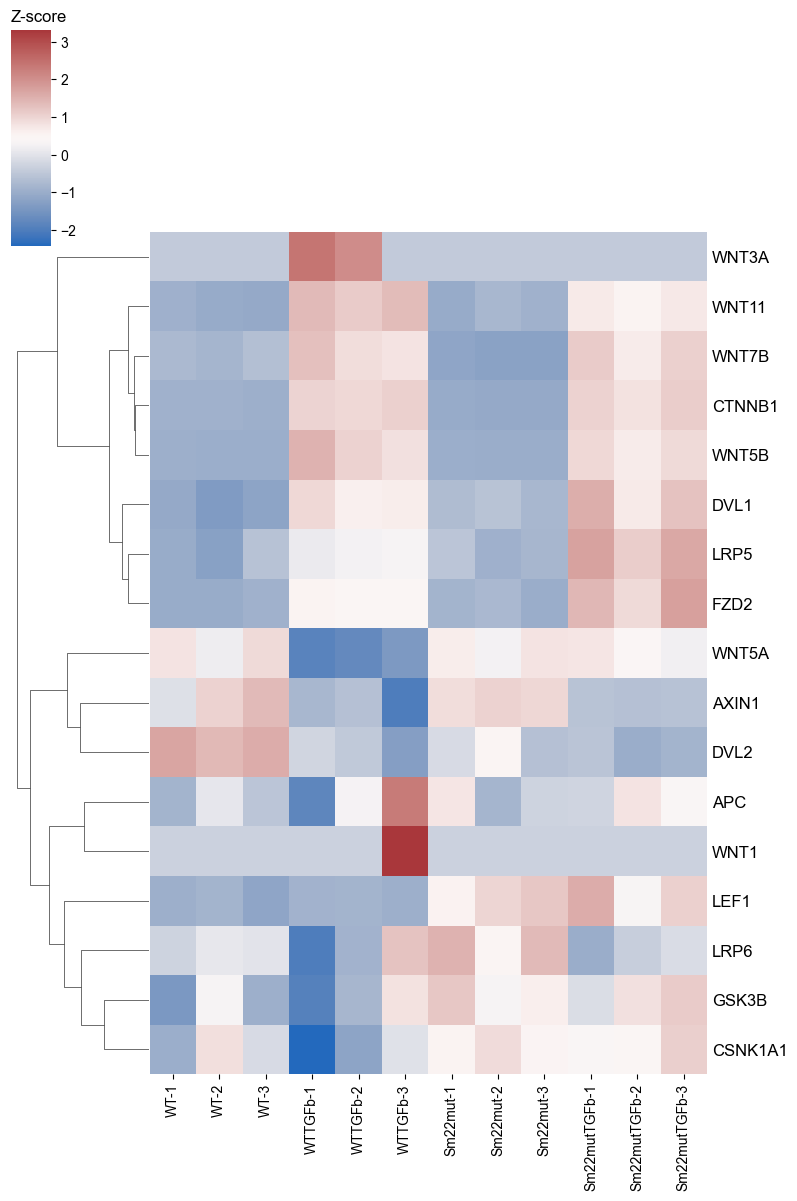

In [12]:
# Heatmap for WNT signaling pathway (Figure 17b)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib import rcParams

# Set Arial as the default font
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Load your normalized counts and significant genes
counts_path = r'C:\Users\jtn170230\OneDrive - The University of Texas at Dallas\Bleris Lab\EMT\RNA sequencing\data\fCounts\DESeq2\normalized_counts_filtered.csv'
gene_list_path = r'C:\Users\jtn170230\Documents\Cytoscape 3\7bGenes.csv'

# Step 1: Read the main CSV into a DataFrame
df = pd.read_csv(counts_path, index_col=0)

# Step 2: Read the gene list CSV into a DataFrame
gene_list_df = pd.read_csv(gene_list_path, header=0)  # header=0 to account for the 'Geneid' header

# Step 3: Extract gene IDs
gene_ids = gene_list_df['Gene']

# Step 4: Filter the main DataFrame to keep only the significant genes
norm_counts = df.loc[df.index.intersection(gene_ids)]

# Step 5: Scale the counts (convert to z-scores)
scaled_counts = norm_counts.apply(zscore, axis=1)

# Step 6: Rename the columns (samples)
new_sample_names = ['WT-1', 'WT-2', 'WT-3', 'WTTGFb-1', 'WTTGFb-2', 'WTTGFb-3', 'Sm22mut-1', 'Sm22mut-2', 'Sm22mut-3', 'Sm22mutTGFb-1', 'Sm22mutTGFb-2', 'Sm22mutTGFb-3']
scaled_counts.columns = new_sample_names

# Step 7: Reorder the columns based on new sample names
scaled_counts = scaled_counts[new_sample_names]

# Step 8: Custom color palette: negative z-scores green, positive z-scores red, zero black
color_palette = sns.color_palette("vlag", as_cmap=True)

# Step 9: Create a clustermap
g = sns.clustermap(scaled_counts, cmap=color_palette, figsize=(8, 12), method='average', metric='euclidean',
                   row_cluster=True, col_cluster=False, xticklabels=True, yticklabels=True)

# Step 10: Change font size for y-tick labels and ensure all labels are shown
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=12)  # Adjust font size as needed
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # Rotate labels if necessary to avoid overlap

# Ensure all labels are shown (disable automatic hiding)
g.ax_heatmap.yaxis.set_tick_params(length=0)  # Remove tick lines

# Step 10: Add a Z-score title to the legend
colorbar = g.cax
colorbar.set_title('Z-score', loc='left')

# Show the plot
plt.show()